# Deployment with Gradio + HuggingFace spaces
We first need to train a model then we can deploy it.

In [15]:
import socket, warnings

In [16]:
from fastbook import *
from fastai.vision.widgets import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(search_images_ddg(term, max_images=max_images))

In [17]:
urls = search_images('mirage csgo', max_images=1)
urls[0]

Searching for 'mirage csgo'


'https://vignette.wikia.nocookie.net/cswikia/images/e/ec/De_mirage-csgo-bombB-back.png/revision/latest?cb=20140630021304'

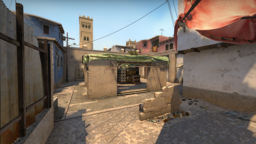

In [18]:
from fastdownload import download_url
dest = 'photos/mirage.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'ancient csgo'


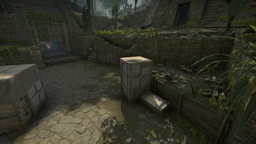

In [19]:
download_url(search_images('ancient csgo', max_images=1)[0], 'photos/ancient.jpg', show_progress=False)
Image.open('photos/ancient.jpg').to_thumb(256,256)

In [20]:
maps = [
    'mirage','ancient',
    'anubis','train',
    'dust 2','inferno',
    'nuke','vertigo',
    'overpass'
]

path = Path('csgo_maps')
from time import sleep

for o in maps:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} csgo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} a site csgo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} b site csgo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} middle csgo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'nuke csgo'
Searching for 'nuke a site csgo'
Searching for 'nuke b site csgo'
Searching for 'nuke middle csgo'
Searching for 'vertigo csgo'
Searching for 'vertigo a site csgo'
Searching for 'vertigo b site csgo'
Searching for 'vertigo middle csgo'
Searching for 'overpass csgo'
Searching for 'overpass a site csgo'
Searching for 'overpass b site csgo'
Searching for 'overpass middle csgo'


In [21]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

58

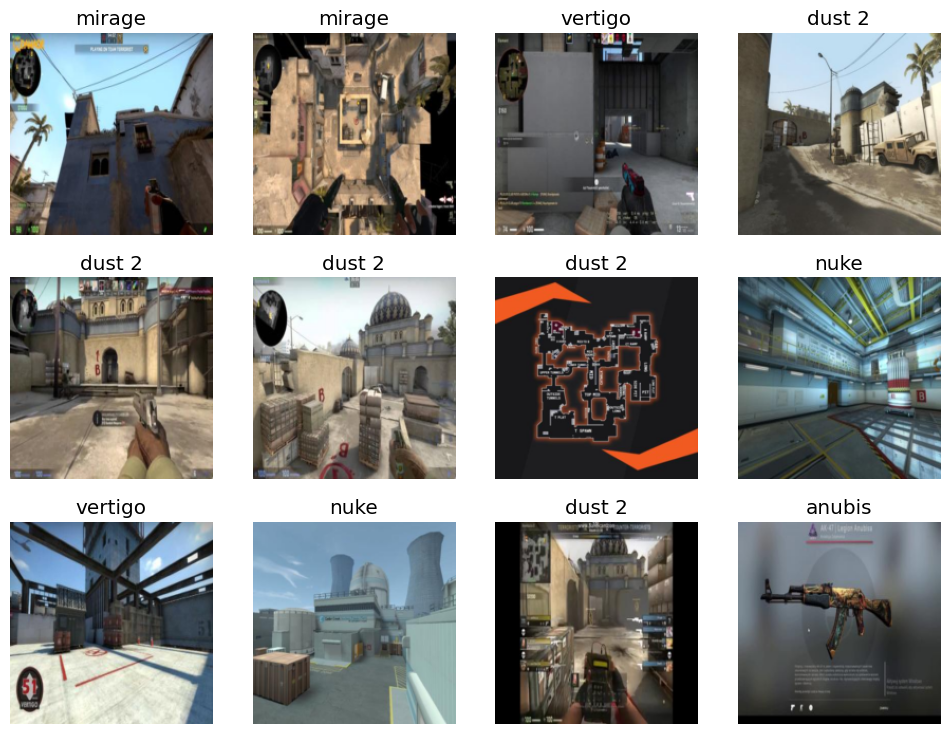

In [23]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=12)

In [24]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\edizu/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:07<00:00, 6.21MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.951124,1.351997,0.441026,00:28


epoch,train_loss,valid_loss,error_rate,time
0,1.282955,0.963380,0.271795,00:38
1,0.871547,0.875663,0.200000,00:38
2,0.615086,0.859091,0.194872,00:40


In [ ]:
learn.export("csgo_map_classifier.pkl")